Namespace(task='tmp_proj_cl_task', debug=False, storage=PosixPath('../storage'), save_results=True, seed=125, epochs=4, dataset='MNIST_5k', batch_size=64, lr=0.01, loss='MSE', model='MLP', hidden_sizes=[200, 200, 200], activation='tanh', warm_up_epochs=1, algo='SGD', plot_losses=True, n_experiences=2)
Namespace(task='tmp_proj_cl_task', debug=False, storage=PosixPath('../storage'), save_results=True, seed=125, epochs=4, dataset='MNIST_5k', batch_size=64, lr=0.01, loss='MSE', model='MLP', hidden_sizes=[200, 200, 200], activation='tanh', warm_up_epochs=1, algo='SGD', plot_losses=True, n_experiences=2)
Namespace(task='tmp_proj_cl_task', debug=False, storage=PosixPath('../storage'), save_results=True, seed=125, epochs=4, dataset='MNIST_5k', batch_size=64, lr=0.01, loss='MSE', model='MLP', hidden_sizes=[200, 200, 200], activation='tanh', warm_up_epochs=1, algo='Top-SGD', plot_losses=True, n_experiences=2)
Namespace(task='tmp_proj_cl_task', debug=False, storage=PosixPath('../storage'), save_r

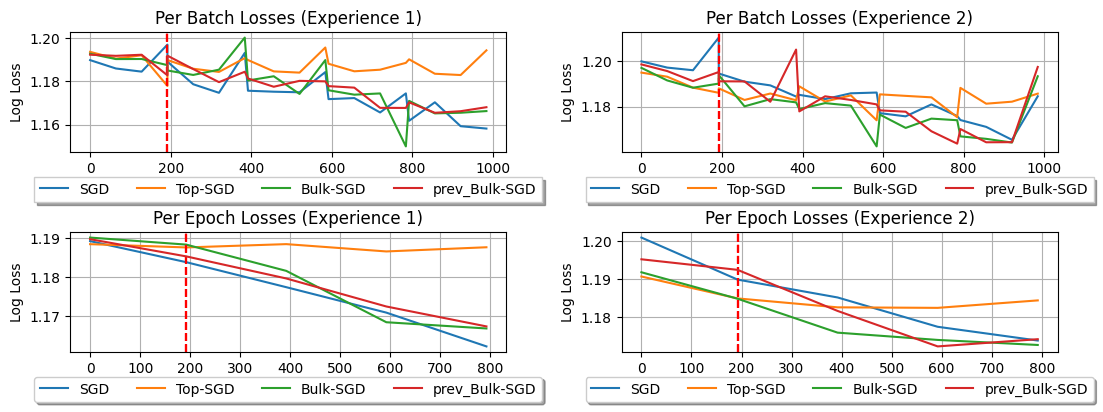

In [ ]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np

# Define file paths

#Subset size 200
file_paths = [
    "/Users/dudchenko/SANDBOX/S3/S3/storage/projected_training_20241129_152525_CL_MNIST_5k_tmp_proj_cl_task_MLP_tanh_SGD__hid_sizes_200-200-200.pkl",
    "/Users/dudchenko/SANDBOX/S3/S3/storage/projected_training_20241129_154127_CL_MNIST_5k_tmp_proj_cl_task_MLP_tanh_Top-SGD__hid_sizes_200-200-200.pkl",
    "/Users/dudchenko/SANDBOX/S3/S3/storage/projected_training_20241129_143457_CL_MNIST_5k_tmp_proj_cl_task_MLP_tanh_Bulk-SGD__hid_sizes_200-200-200.pkl",
    "/Users/dudchenko/SANDBOX/S3/S3/storage/projected_training_20241129_174306_CL_MNIST_5k_proj_on_prev_exp_cl_task_MLP_tanh_prev_Bulk-SGD__hid_sizes_200-200-200.pkl"
]

with open(file_paths[0], "rb") as file:
    results = pickle.load(file)
all_train_losses = results["all_train_losses"]
all_warm_up_losses = results["all_warm_up_losses"]

num_experiences = len(all_warm_up_losses)
fig, axes = plt.subplots(2, num_experiences, figsize=(5 * num_experiences*1.1, 4), constrained_layout=True)
if num_experiences == 1:
    axes = [[axes[0]], [axes[1]]]

# Function to load and plot data
def load_and_plot(file_paths):
    for file_path in file_paths:
        with open(file_path, "rb") as file:
            results = pickle.load(file)
        
        args = results["args"]
        all_train_losses = results["all_train_losses"]
        all_warm_up_losses = results["all_warm_up_losses"]


        
        # Define output name for visualization

        # Plot data
        for i, (warm_up_losses, train_losses) in enumerate(zip(all_warm_up_losses, all_train_losses)):
            # Combine batch and epoch losses
            per_batch_losses = warm_up_losses[0] + train_losses[0]
            per_epoch_losses = warm_up_losses[1] + train_losses[1]

            # Combine training steps
            training_steps_per_batch = warm_up_losses[2] + train_losses[2]
            training_steps_per_epoch = warm_up_losses[3] + train_losses[3]

            # Determine end of warm-up step
            warm_up_training_steps = 0 if len(warm_up_losses[2]) == 0 else warm_up_losses[2][-1]

            # First row: Per Batch Losses
            axes[0][i].axvline(x=warm_up_training_steps, color='red', linestyle='--')
            axes[0][i].plot(training_steps_per_batch, np.log1p(per_batch_losses), label=args.algo)
            axes[0][i].set_title(f"Per Batch Losses (Experience {i + 1})")
            axes[0][i].set_xlabel("Training Step")
            axes[0][i].set_ylabel("Log Loss")
            axes[0][i].grid(True)
            axes[0][i].legend()
            axes[0][i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=True, ncol=4)


            # Second row: Per Epoch Losses
            axes[1][i].axvline(x=warm_up_training_steps, color='red', linestyle='--')
            axes[1][i].plot(training_steps_per_epoch, np.log1p(per_epoch_losses), label=args.algo)
            axes[1][i].set_title(f"Per Epoch Losses (Experience {i + 1})")
            axes[1][i].set_xlabel("Training Step")
            axes[1][i].set_ylabel("Log Loss")
            axes[1][i].grid(True)
            axes[1][i].legend()
            axes[1][i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=4)


            print(args)

        # Save and show the plot
    plt.show()

# Call the function
load_and_plot(file_paths)


Namespace(task='proj_on_prev_exp_cl_task', debug=False, storage=PosixPath('../storage'), save_results=True, seed=125, epochs=4, dataset='MNIST_5k', batch_size=64, lr=0.01, loss='MSE', model='MLP', hidden_sizes=[200, 200, 200], activation='tanh', warm_up_epochs=1, algo='SGD', plot_losses=True, n_experiences=2)
Namespace(task='proj_on_prev_exp_cl_task', debug=False, storage=PosixPath('../storage'), save_results=True, seed=125, epochs=4, dataset='MNIST_5k', batch_size=64, lr=0.01, loss='MSE', model='MLP', hidden_sizes=[200, 200, 200], activation='tanh', warm_up_epochs=1, algo='SGD', plot_losses=True, n_experiences=2)
Namespace(task='proj_on_prev_exp_cl_task', debug=False, storage=PosixPath('../storage'), save_results=True, seed=125, epochs=4, dataset='MNIST_5k', batch_size=64, lr=0.01, loss='MSE', model='MLP', hidden_sizes=[200, 200, 200], activation='tanh', warm_up_epochs=1, algo='prev_Bulk-SGD', plot_losses=True, n_experiences=2)
Namespace(task='proj_on_prev_exp_cl_task', debug=False, s

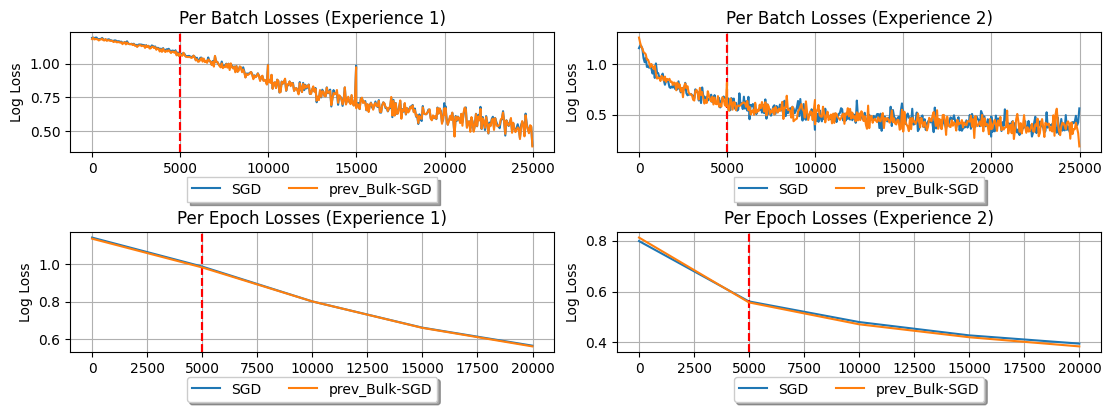

In [16]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np

# Define file paths

#Subset size 200
file_paths = [
    "/Users/dudchenko/SANDBOX/S3/S3/storage/projected_training_20241129_175446_CL_MNIST_5k_proj_on_prev_exp_cl_task_MLP_tanh_SGD__hid_sizes_200-200-200.pkl",
    "/Users/dudchenko/SANDBOX/S3/S3/storage/projected_training_20241129_175601_CL_MNIST_5k_proj_on_prev_exp_cl_task_MLP_tanh_prev_Bulk-SGD__hid_sizes_200-200-200.pkl"
]

with open(file_paths[0], "rb") as file:
    results = pickle.load(file)
all_train_losses = results["all_train_losses"]
all_warm_up_losses = results["all_warm_up_losses"]

num_experiences = len(all_warm_up_losses)
fig, axes = plt.subplots(2, num_experiences, figsize=(5 * num_experiences*1.1, 4), constrained_layout=True)
if num_experiences == 1:
    axes = [[axes[0]], [axes[1]]]

# Function to load and plot data
def load_and_plot(file_paths):
    for file_path in file_paths:
        with open(file_path, "rb") as file:
            results = pickle.load(file)
        
        args = results["args"]
        all_train_losses = results["all_train_losses"]
        all_warm_up_losses = results["all_warm_up_losses"]


        
        # Define output name for visualization

        # Plot data
        for i, (warm_up_losses, train_losses) in enumerate(zip(all_warm_up_losses, all_train_losses)):
            # Combine batch and epoch losses
            per_batch_losses = warm_up_losses[0] + train_losses[0]
            per_epoch_losses = warm_up_losses[1] + train_losses[1]

            # Combine training steps
            training_steps_per_batch = warm_up_losses[2] + train_losses[2]
            training_steps_per_epoch = warm_up_losses[3] + train_losses[3]

            # Determine end of warm-up step
            warm_up_training_steps = 0 if len(warm_up_losses[2]) == 0 else warm_up_losses[2][-1]

            # First row: Per Batch Losses
            axes[0][i].axvline(x=warm_up_training_steps, color='red', linestyle='--')
            axes[0][i].plot(training_steps_per_batch, np.log1p(per_batch_losses), label=args.algo)
            axes[0][i].set_title(f"Per Batch Losses (Experience {i + 1})")
            axes[0][i].set_xlabel("Training Step")
            axes[0][i].set_ylabel("Log Loss")
            axes[0][i].grid(True)
            axes[0][i].legend()
            axes[0][i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=True, ncol=4)


            # Second row: Per Epoch Losses
            axes[1][i].axvline(x=warm_up_training_steps, color='red', linestyle='--')
            axes[1][i].plot(training_steps_per_epoch, np.log1p(per_epoch_losses), label=args.algo)
            axes[1][i].set_title(f"Per Epoch Losses (Experience {i + 1})")
            axes[1][i].set_xlabel("Training Step")
            axes[1][i].set_ylabel("Log Loss")
            axes[1][i].grid(True)
            axes[1][i].legend()
            axes[1][i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=4)


            print(args)

        # Save and show the plot
    plt.show()

# Call the function
load_and_plot(file_paths)


prevBulkSGD
> Eval on experience 0 (Task 0) 
        Loss_Exp/eval_phase/test_stream/Task000/Exp000 = 0.5518
        Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.8428
> Eval on experience 1 (Task 0) from test stream ended.
        Loss_Exp/eval_phase/test_stream/Task000/Exp001 = 0.4700
        Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001 = 0.8775
-- >> End of eval phase << --
        Loss_Stream/eval_phase/test_stream/Task000 = 0.5109
        Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.8601

SGD
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████████████████████████████████████████████| 157/157 [00:00<00:00, 186.31it/s]
> Eval on experience 0 (Task 0) from test stream ended.
        Loss_Exp/eval_phase/test_stream/Task000/Exp000 = 0.5608
        Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.8390
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████████████████████████████████████████████| 157/157 [00:00<00:00, 256.79it/s]
> Eval on experience 1 (Task 0) from test stream ended.
        Loss_Exp/eval_phase/test_stream/Task000/Exp001 = 0.4685
        Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001 = 0.8784
-- >> End of eval phase << --
        Loss_Stream/eval_phase/test_stream/Task000 = 0.5146
        Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.8587


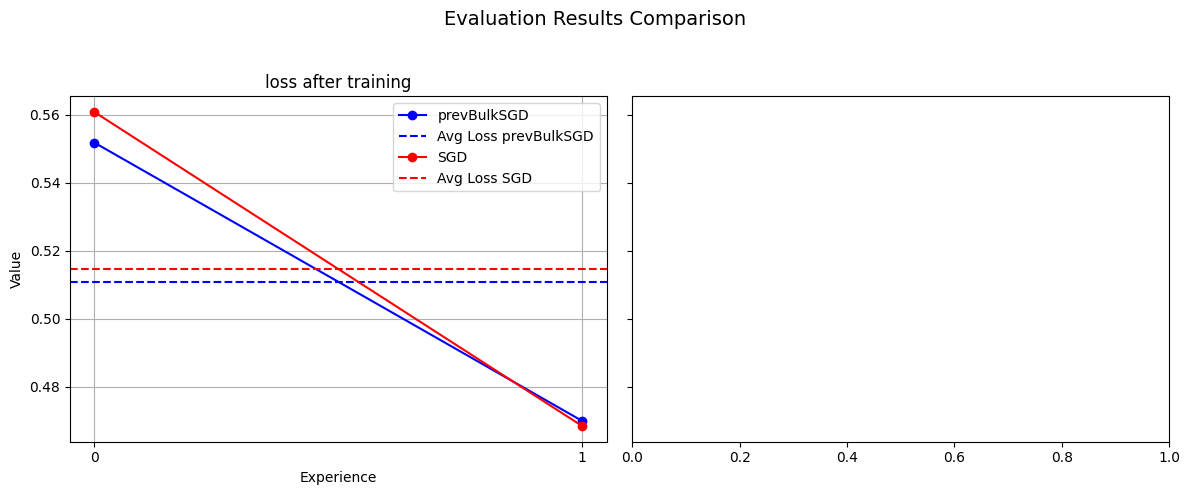

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Data for prevBulkSGD
prevBulkSGD_loss = [0.5518, 0.4700]
prevBulkSGD_acc = [0.8428, 0.8775]
prevBulkSGD_avg_loss = 0.5109
prevBulkSGD_avg_acc = 0.8601

# Data for SGD
SGD_loss = [0.5608, 0.4685]
SGD_acc = [0.8390, 0.8784]
SGD_avg_loss = 0.5146
SGD_avg_acc = 0.8587

# Experiences
experiences = [0, 1]

# Plot settings
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Evaluation Results Comparison", fontsize=14)

# Subplot for prevBulkSGD
axes[0].plot(experiences, prevBulkSGD_loss, marker='o', label="prevBulkSGD", color='blue')
#axes[0].plot(experiences, prevBulkSGD_acc, marker='o', label="Accuracy", color='green')
axes[0].axhline(y=prevBulkSGD_avg_loss, color='blue', linestyle='--', label="Avg Loss prevBulkSGD")
#axes[0].axhline(y=prevBulkSGD_avg_acc, color='green', linestyle='--', label="Avg Accuracy")
axes[0].set_title("prevBulkSGD")
axes[0].set_xlabel("Experience")
axes[0].set_ylabel("Value")
axes[0].set_xticks(experiences)
axes[0].grid(True)
axes[0].legend()

# Subplot for SGD
axes[0].plot(experiences, SGD_loss, marker='o', label="SGD", color='red')
#axes[0].plot(experiences, SGD_acc, marker='o', label="Accuracy", color='green')
axes[0].axhline(y=SGD_avg_loss, color='red', linestyle='--', label="Avg Loss SGD")
#axes[0].axhline(y=SGD_avg_acc, color='green', linestyle='--', label="Avg Accuracy")
axes[0].set_title("loss after training")
axes[0].set_xlabel("Experience")
axes[0].set_xticks(experiences)
axes[0].grid(True)
axes[0].legend()

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.show()


Namespace(task='proj_on_prev_exp_cl_task', debug=False, storage=PosixPath('../storage'), save_results=True, seed=92, epochs=4, dataset='MNIST_5k', batch_size=64, lr=0.01, loss='MSE', model='MLP', hidden_sizes=[200, 200, 200], activation='tanh', warm_up_epochs=1, algo='prev_Bulk-SGD', plot_losses=True, n_experiences=2)
Namespace(task='proj_on_prev_exp_cl_task', debug=False, storage=PosixPath('../storage'), save_results=True, seed=92, epochs=4, dataset='MNIST_5k', batch_size=64, lr=0.01, loss='MSE', model='MLP', hidden_sizes=[200, 200, 200], activation='tanh', warm_up_epochs=1, algo='prev_Bulk-SGD', plot_losses=True, n_experiences=2)
Namespace(task='proj_on_prev_exp_cl_task', debug=False, storage=PosixPath('../storage'), save_results=True, seed=72, epochs=4, dataset='MNIST_5k', batch_size=64, lr=0.01, loss='MSE', model='MLP', hidden_sizes=[200, 200, 200], activation='tanh', warm_up_epochs=1, algo='prev_Bulk-SGD', plot_losses=True, n_experiences=2)
Namespace(task='proj_on_prev_exp_cl_task

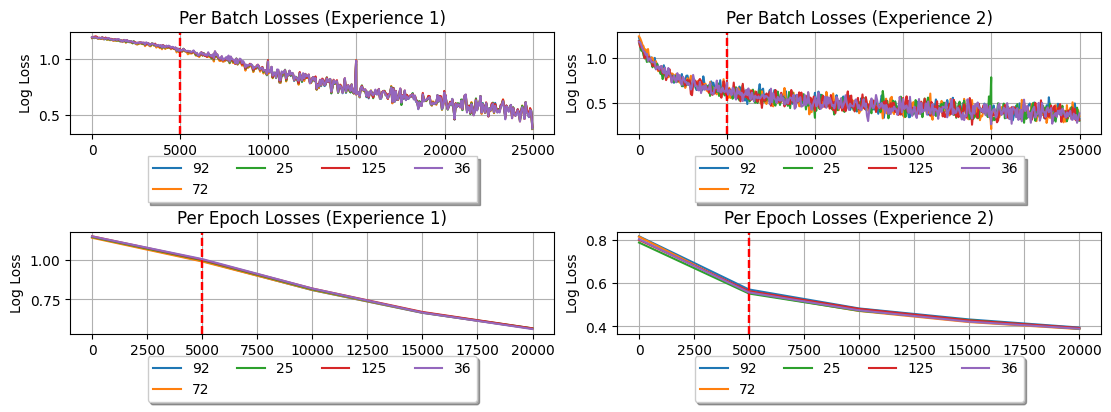

In [ ]:
#Different seeds
import os
import glob

# Directory to search in
directory = "/Users/dudchenko/SANDBOX/S3/S3/storage/"

# Pattern to match files with different seed values
pattern = "projected_training_CL_MNIST_5k_proj_on_prev_exp_cl_task_MLP_tanh_prev_Bulk-SGD_seed_*_hid_sizes_200-200-200.pkl"

# Use glob to find all matching files
file_paths = glob.glob(os.path.join(directory, pattern))

file_paths  # Display the list of matching file paths


with open(file_paths[0], "rb") as file:
    results = pickle.load(file)
all_train_losses = results["all_train_losses"]
all_warm_up_losses = results["all_warm_up_losses"]

num_experiences = len(all_warm_up_losses)
fig, axes = plt.subplots(2, num_experiences, figsize=(5 * num_experiences*1.1, 4), constrained_layout=True)
if num_experiences == 1:
    axes = [[axes[0]], [axes[1]]]

# Function to load and plot data
def load_and_plot(file_paths):
    for file_path in file_paths:
        with open(file_path, "rb") as file:
            results = pickle.load(file)
        
        args = results["args"]
        all_train_losses = results["all_train_losses"]
        all_warm_up_losses = results["all_warm_up_losses"]


        
        # Define output name for visualization

        # Plot data
        for i, (warm_up_losses, train_losses) in enumerate(zip(all_warm_up_losses, all_train_losses)):
            # Combine batch and epoch losses
            per_batch_losses = warm_up_losses[0] + train_losses[0]
            per_epoch_losses = warm_up_losses[1] + train_losses[1]

            # Combine training steps
            training_steps_per_batch = warm_up_losses[2] + train_losses[2]
            training_steps_per_epoch = warm_up_losses[3] + train_losses[3]

            # Determine end of warm-up step
            warm_up_training_steps = 0 if len(warm_up_losses[2]) == 0 else warm_up_losses[2][-1]

            # First row: Per Batch Losses
            axes[0][i].axvline(x=warm_up_training_steps, color='red', linestyle='--')
            axes[0][i].plot(training_steps_per_batch, np.log1p(per_batch_losses), label=args.seed)
            axes[0][i].set_title(f"Per Batch Losses (Experience {i + 1})")
            axes[0][i].set_xlabel("Training Step")
            axes[0][i].set_ylabel("Log Loss")
            axes[0][i].grid(True)
            axes[0][i].legend()
            axes[0][i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=True, ncol=4)


            # Second row: Per Epoch Losses
            axes[1][i].axvline(x=warm_up_training_steps, color='red', linestyle='--')
            axes[1][i].plot(training_steps_per_epoch, np.log1p(per_epoch_losses), label=args.seed)
            axes[1][i].set_title(f"Per Epoch Losses (Experience {i + 1})")
            axes[1][i].set_xlabel("Training Step")
            axes[1][i].set_ylabel("Log Loss")
            axes[1][i].grid(True)
            axes[1][i].legend()
            axes[1][i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=4)


            print(args)

        # Save and show the plot
    plt.show()

# Call the function
load_and_plot(file_paths)


Namespace(task='proj_on_prev_exp_cl_task', debug=False, storage=PosixPath('../storage'), save_results=True, seed=92, epochs=4, dataset='MNIST_5k', batch_size=64, lr=0.01, loss='MSE', model='MLP', hidden_sizes=[200, 200, 200], activation='tanh', warm_up_epochs=1, algo='prev_Bulk-SGD', plot_losses=True, n_experiences=2)
Namespace(task='proj_on_prev_exp_cl_task', debug=False, storage=PosixPath('../storage'), save_results=True, seed=92, epochs=4, dataset='MNIST_5k', batch_size=64, lr=0.01, loss='MSE', model='MLP', hidden_sizes=[200, 200, 200], activation='tanh', warm_up_epochs=1, algo='prev_Bulk-SGD', plot_losses=True, n_experiences=2)
Namespace(task='proj_on_prev_exp_cl_task', debug=False, storage=PosixPath('../storage'), save_results=True, seed=72, epochs=4, dataset='MNIST_5k', batch_size=64, lr=0.01, loss='MSE', model='MLP', hidden_sizes=[200, 200, 200], activation='tanh', warm_up_epochs=1, algo='prev_Bulk-SGD', plot_losses=True, n_experiences=2)
Namespace(task='proj_on_prev_exp_cl_task

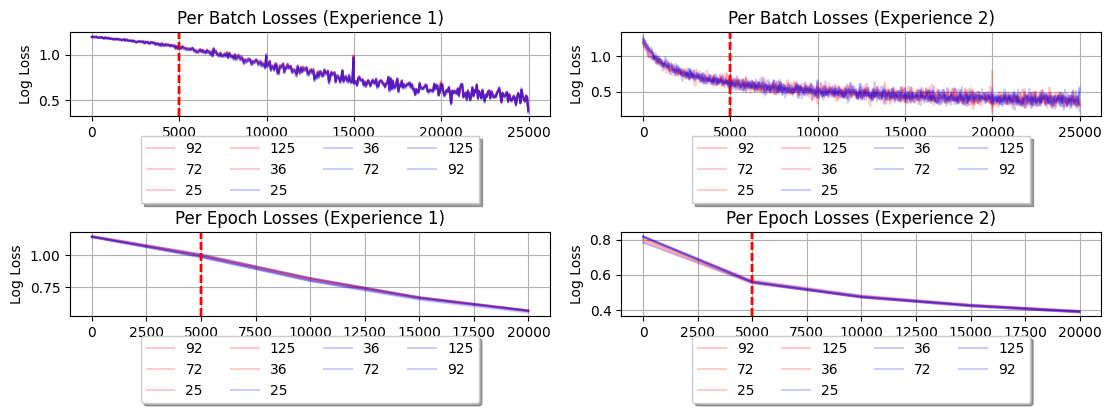

In [ ]:
#Different seeds
import os
import glob

# Directory to search in
directory = "/Users/dudchenko/SANDBOX/S3/S3/storage/"

# Pattern to match files with different seed values
pattern = "projected_training_CL_MNIST_5k_proj_on_prev_exp_cl_task_MLP_tanh_prev_Bulk-SGD_seed_*_hid_sizes_200-200-200.pkl"
pattern_SGD = "projected_training_CL_MNIST_5k_proj_on_prev_exp_cl_task_MLP_tanh_SGD_seed_*_hid_sizes_200-200-200.pkl"

# Use glob to find all matching files
file_paths = glob.glob(os.path.join(directory, pattern))
file_paths_SGD = glob.glob(os.path.join(directory, pattern_SGD))

file_paths  # Display the list of matching file paths


with open(file_paths[0], "rb") as file:
    results = pickle.load(file)
all_train_losses = results["all_train_losses"]
all_warm_up_losses = results["all_warm_up_losses"]

num_experiences = len(all_warm_up_losses)
fig, axes = plt.subplots(2, num_experiences, figsize=(5 * num_experiences*1.1, 4), constrained_layout=True)
if num_experiences == 1:
    axes = [[axes[0]], [axes[1]]]

# Function to load and plot data
def load_and_plot(file_paths, color):
    for file_path in file_paths:
        with open(file_path, "rb") as file:
            results = pickle.load(file)
        
        args = results["args"]
        all_train_losses = results["all_train_losses"]
        all_warm_up_losses = results["all_warm_up_losses"]


        
        # Define output name for visualization

        # Plot data
        for i, (warm_up_losses, train_losses) in enumerate(zip(all_warm_up_losses, all_train_losses)):
            # Combine batch and epoch losses
            per_batch_losses = warm_up_losses[0] + train_losses[0]
            per_epoch_losses = warm_up_losses[1] + train_losses[1]

            # Combine training steps
            training_steps_per_batch = warm_up_losses[2] + train_losses[2]
            training_steps_per_epoch = warm_up_losses[3] + train_losses[3]

            # Determine end of warm-up step
            warm_up_training_steps = 0 if len(warm_up_losses[2]) == 0 else warm_up_losses[2][-1]

            # First row: Per Batch Losses
            axes[0][i].axvline(x=warm_up_training_steps, color='red', linestyle='--')
            axes[0][i].plot(training_steps_per_batch, np.log1p(per_batch_losses), label=str(args.seed), color=color, alpha=0.2)
            axes[0][i].set_title(f"Per Batch Losses (Experience {i + 1})")
            axes[0][i].set_xlabel("Training Step")
            axes[0][i].set_ylabel("Log Loss")
            axes[0][i].grid(True)
            axes[0][i].legend()
            axes[0][i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=True, ncol=4)


            # Second row: Per Epoch Losses
            axes[1][i].axvline(x=warm_up_training_steps, color='red', linestyle='--')
            axes[1][i].plot(training_steps_per_epoch, np.log1p(per_epoch_losses), label=str(args.seed), color=color, alpha=0.2)
            axes[1][i].set_title(f"Per Epoch Losses (Experience {i + 1})")
            axes[1][i].set_xlabel("Training Step")
            axes[1][i].set_ylabel("Log Loss")
            axes[1][i].grid(True)
            axes[1][i].legend()
            axes[1][i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=4)




        # Save and show the plot

# Call the function
load_and_plot(file_paths, color = 'red')
load_and_plot(file_paths_SGD, color = 'blue')
plt.show()


In [ ]:
#Different seeds
import os
import glob

# Directory to search in
directory = "/Users/dudchenko/SANDBOX/S3/S3/storage/"

# Pattern to match files with different seed values
pattern = "projected_training_CL_MNIST_5k_proj_on_prev_exp_cl_task_MLP_tanh_prev_Bulk-SGD_seed_*_hid_sizes_200-200-200.pkl"
pattern_SGD = "projected_training_CL_MNIST_5k_proj_on_prev_exp_cl_task_MLP_tanh_SGD_seed_*_hid_sizes_200-200-200.pkl"

# Use glob to find all matching files
file_paths = glob.glob(os.path.join(directory, pattern))
file_paths_SGD = glob.glob(os.path.join(directory, pattern_SGD))

file_paths  # Display the list of matching file paths


with open(file_paths[0], "rb") as file:
    results = pickle.load(file)
all_train_losses = results["all_train_losses"]
all_warm_up_losses = results["all_warm_up_losses"]

num_experiences = len(all_warm_up_losses)
fig, axes = plt.subplots(2, num_experiences, figsize=(5 * num_experiences*1.1, 4), constrained_layout=True)
if num_experiences == 1:
    axes = [[axes[0]], [axes[1]]]

# Function to load and plot data
def load_and_plot(file_paths, color):
    for file_path in file_paths:
        with open(file_path, "rb") as file:
            results = pickle.load(file)
        
        args = results["args"]
        all_train_losses = results["all_train_losses"]
        all_warm_up_losses = results["all_warm_up_losses"]


        per_batch_losses_all_seeds = [[],[]]
        # Define output name for visualization

        # Plot data
        for i, (warm_up_losses, train_losses) in enumerate(zip(all_warm_up_losses, all_train_losses)):
            # Combine batch and epoch losses
            per_batch_losses = warm_up_losses[0] + train_losses[0]
            per_epoch_losses = warm_up_losses[1] + train_losses[1]
            per_batch_losses_all_seeds.append(per_batch_losses)

            # Combine training steps
            training_steps_per_batch = warm_up_losses[2] + train_losses[2]
            training_steps_per_epoch = warm_up_losses[3] + train_losses[3]

            # Determine end of warm-up step
            warm_up_training_steps = 0 if len(warm_up_losses[2]) == 0 else warm_up_losses[2][-1]

            # First row: Per Batch Losses
            axes[0][i].axvline(x=warm_up_training_steps, color='red', linestyle='--')
            axes[0][i].plot(training_steps_per_batch, np.log1p(per_batch_losses), label=args.seed, color=color, alpha=0.2)
            axes[0][i].set_title(f"Per Batch Losses (Experience {i + 1})")
            axes[0][i].set_xlabel("Training Step")
            axes[0][i].set_ylabel("Log Loss")
            axes[0][i].grid(True)
            axes[0][i].legend()
            axes[0][i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=True, ncol=4)


            # Second row: Per Epoch Losses
            axes[1][i].axvline(x=warm_up_training_steps, color='red', linestyle='--')
            axes[1][i].plot(training_steps_per_epoch, np.log1p(per_epoch_losses), label=args.seed, color=color, alpha=0.2)
            axes[1][i].set_title(f"Per Epoch Losses (Experience {i + 1})")
            axes[1][i].set_xlabel("Training Step")
            axes[1][i].set_ylabel("Log Loss")
            axes[1][i].grid(True)
            axes[1][i].legend()
            axes[1][i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=4)


            print(args)

        # Save and show the plot

# Call the function
load_and_plot(file_paths, color = 'red')
load_and_plot(file_paths_SGD, color = 'blue')
plt.show()


Shape of avg_losses_experience_1: (5,)
Shape of avg_losses_experience_2: (5,)
Shape of training_steps_per_batch: (395,)


ValueError: Length mismatch: training_steps_per_batch (395) and avg_losses_experience_1 (5)

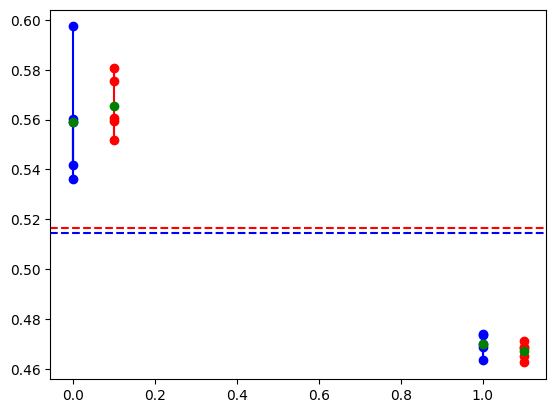

In [72]:
import matplotlib.pyplot as plt
import numpy as np


#Different seeds
import os
import glob

# Directory to search in
directory = "/Users/dudchenko/SANDBOX/S3/S3/storage/"

# Pattern to match files with different seed values
pattern = "projected_training_CL_MNIST_5k_proj_on_prev_exp_cl_task_MLP_tanh_prev_Bulk-SGD_seed_*_hid_sizes_200-200-200.pkl"
pattern_SGD = "projected_training_CL_MNIST_5k_proj_on_prev_exp_cl_task_MLP_tanh_SGD_seed_*_hid_sizes_200-200-200.pkl"

# Use glob to find all matching files
file_paths = glob.glob(os.path.join(directory, pattern))
file_paths_SGD = glob.glob(os.path.join(directory, pattern_SGD))



def load_and_extract_losses(file_paths):
    loss_exp_000 = []
    loss_exp_001 = []
    loss_stream = []
    
    for file_path in file_paths:
        with open(file_path, "rb") as file:
            results = pickle.load(file)["final_accuracy"]
        
        # Extract the specific Loss values and append to the respective lists
        loss_exp_000.append(results["Loss_Exp/eval_phase/test_stream/Task000/Exp000"])
        loss_exp_001.append(results["Loss_Exp/eval_phase/test_stream/Task000/Exp001"])
        loss_stream.append(results["Loss_Stream/eval_phase/test_stream/Task000"])
    
    return loss_exp_000, loss_exp_001, loss_stream


loss_exp_000_prevBulk, loss_exp_001_prevBulk, loss_stream_prevBulk = load_and_extract_losses(file_paths)
loss_exp_000_sgd, loss_exp_001_sgd, loss_stream_sgd = load_and_extract_losses(file_paths_SGD)


plt.plot([0,0,0,0,0], loss_exp_000_prevBulk, marker='o', label="prevBulkSGD", color='blue')
plt.plot([0], np.mean(loss_exp_000_prevBulk), marker='o', label="prevBulkSGD", color='green')

plt.plot([1,1,1,1,1], loss_exp_001_prevBulk, marker='o', label="prevBulkSGD", color='blue')
plt.plot([1], np.mean(loss_exp_001_prevBulk), marker='o', label="prevBulkSGD", color='green')

plt.plot([0.1,0.1,0.1,0.1,0.1], loss_exp_000_sgd, marker='o', label="SGD", color='red')
plt.plot([0.1], np.mean(loss_exp_000_sgd), marker='o', label="prevBulkSGD", color='green')

plt.plot([1.1,1.1,1.1,1.1,1.1], loss_exp_001_sgd, marker='o', label="SGD", color='red')
plt.plot([1.1], np.mean(loss_exp_001_sgd), marker='o', label="SGD", color='green')

plt.axhline(y=np.mean(loss_stream_prevBulk), color='blue', linestyle='--', label="Avg Loss SGD")
plt.axhline(y=np.mean(loss_stream_sgd), color='red', linestyle='--', label="Avg Loss SGD")


plt.show()


In [ ]:

# Data for prevBulkSGD
prevBulkSGD_loss = [0.5518, 0.4700]
prevBulkSGD_avg_loss = 0.5109

# Data for SGD
SGD_loss = [0.5608, 0.4685]
SGD_avg_loss = 0.5146

# Experiences
experiences = [0, 1]

# Plot settings
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Evaluation Results Comparison", fontsize=14)

# Subplot for prevBulkSGD
axes[0].plot(experiences, prevBulkSGD_loss, marker='o', label="prevBulkSGD", color='blue')
#axes[0].plot(experiences, prevBulkSGD_acc, marker='o', label="Accuracy", color='green')
axes[0].axhline(y=prevBulkSGD_avg_loss, color='blue', linestyle='--', label="Avg Loss prevBulkSGD")
#axes[0].axhline(y=prevBulkSGD_avg_acc, color='green', linestyle='--', label="Avg Accuracy")
axes[0].set_title("prevBulkSGD")
axes[0].set_xlabel("Experience")
axes[0].set_ylabel("Value")
axes[0].set_xticks(experiences)
axes[0].grid(True)
axes[0].legend()

# Subplot for SGD
axes[0].plot(experiences, SGD_loss, marker='o', label="SGD", color='red')
#axes[0].plot(experiences, SGD_acc, marker='o', label="Accuracy", color='green')
axes[0].axhline(y=SGD_avg_loss, color='red', linestyle='--', label="Avg Loss SGD")
#axes[0].axhline(y=SGD_avg_acc, color='green', linestyle='--', label="Avg Accuracy")
axes[0].set_title("loss after training")
axes[0].set_xlabel("Experience")
axes[0].set_xticks(experiences)
axes[0].grid(True)
axes[0].legend()

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.show()
